# Notebook for anlaysing the structure of the social network.

This uses data from simulation batches run using release v1.1 of the model for the Streamlit application.

In [1]:
DATA_DIR = '../simulation_io/streamlit/'

In [2]:
from retrospective_metrics.roi import load_data 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### The following parameters define 'Preset C':

In [3]:
PPS = 3
SD =  0.995
DW = 0.1
TL = 0.1 
TF = 1
TB = 0
BF = 1

optimiser = 'Basin_w_flex'
replicate = 0

#### We load the project table from pre-simulated data for this preset:

In [4]:
SUB_DIR = 'pps_%d_sd_%.3f_dw_%.1f_tl_%.1f_tf_%d_tb_%d_bf_%d_010921_v1.1' % (PPS, SD, DW, TL, TF, TB, BF)
preset_c_projects = load_data(DATA_DIR + SUB_DIR + '/' + optimiser + '/projects_table_rep_%d.pickle' % replicate)

In [5]:
preset_c_projects.head()

,project_id,prob,risk,budget,null,success,maximum_offset,realised_offset,start_time,ovr_prob_cpt,skill_balance_prob_cpt,creativity_match_prob_cpt,risk_prob_cpt,chemistry_prob_cpt,team_budget,team_ovr,team_creativity_level,team_creativity_match,team_size
0,1,0.591988,10,25.0,False,False,0,0,0,49.601135,-0.480250,8.827916,-3.75,5.000000,23.147196,66.134847,4.172453,0.029740,6.0
1,2,0.313460,5,6.0,False,False,0,0,0,21.742495,-0.640392,5.743934,0.00,5.000000,5.797999,28.989993,3.335409,0.112499,5.0
2,0,0.540851,10,27.0,False,True,2,1,3,44.546191,-0.637481,8.926364,-3.75,5.000000,26.727714,59.394921,3.835052,0.027208,7.0
3,5,0.439784,5,19.0,False,True,1,0,2,34.734281,-0.693476,6.009062,0.00,4.285714,18.524950,46.312375,4.675795,0.105109,7.0
4,3,0.330789,5,43.0,False,False,1,0,2,23.826446,-3.888809,9.212672,0.00,3.928571,38.122314,31.768595,5.140995,0.019879,7.0


In [6]:
def stack_probability_bar_chart(df, fsa=12, fst=14):
    """
    Stacked bar chart (with negative values) borrowed from:
    https://stackoverflow.com/questions/35979852/stacked-bar-charts-using-python-matplotlib-for-positive-and-negative-values
    """

    a = df.ovr_prob_cpt / 100
    b = df.skill_balance_prob_cpt / 100
    c = df.creativity_match_prob_cpt / 100
    d = df.risk_prob_cpt / 100
    e = df.chemistry_prob_cpt / 100
    data = np.array([a, b, c, d, e])
    labels = ['OVR', 'Skill Balance', 'Creativity Match', 'Risk', 'Chemistry']
    
    data_shape = np.shape(data)

    # Take negative and positive data apart and cumulate
    def get_cumulated_array(data, **kwargs):
        cum = data.clip(**kwargs)
        cum = np.cumsum(cum, axis=0)
        d = np.zeros(np.shape(data))
        d[1:] = cum[:-1]
        return d  

    cumulated_data = get_cumulated_array(data, min=0)
    cumulated_data_neg = get_cumulated_array(data, max=0)

    # Re-merge negative and positive data.
    row_mask = (data<0)
    cumulated_data[row_mask] = cumulated_data_neg[row_mask]
    data_stack = cumulated_data

    cols = ["g", "y", "b", "c", 'm']

    fig = plt.figure(figsize=(15,10))
    ax = plt.subplot(211)

    for i in np.arange(0, data_shape[0]):
        ax.bar(np.arange(data_shape[1]), data[i], bottom=data_stack[i], color=cols[i], label=labels[i])
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)
    ax.set_ylim([-1.0,1.0])
    plt.ylabel('probability components', fontsize=fsa)
    
    for i in range(len(df)):
        plt.axvline(i, linestyle='--', alpha=0.3)
    
    ax2 = plt.subplot(212, sharex=ax)
    ax2.bar(range(len(df)), df.prob, label='total probability')
    ax2.set_ylim([0,1])
    ax2.set_title("Total Success Probaility", fontsize=fst)
    
    for i in range(len(df)):
        plt.axvline(i, linestyle='--', alpha=0.3)
    
    plt.xlabel('projects', fontsize=fsa)
    plt.ylabel('probability', fontsize=fsa)
    plt.tight_layout()

#### The following charts show subsets of the projects that were created during the simulation of Preset C. They are shown on separate plots just to give more space to be able to see individual projects clearly. 

#### In each case, the top subplot shows the five components of the project success probaility and the bottom subplot show the total success probability (produced by summing the components).

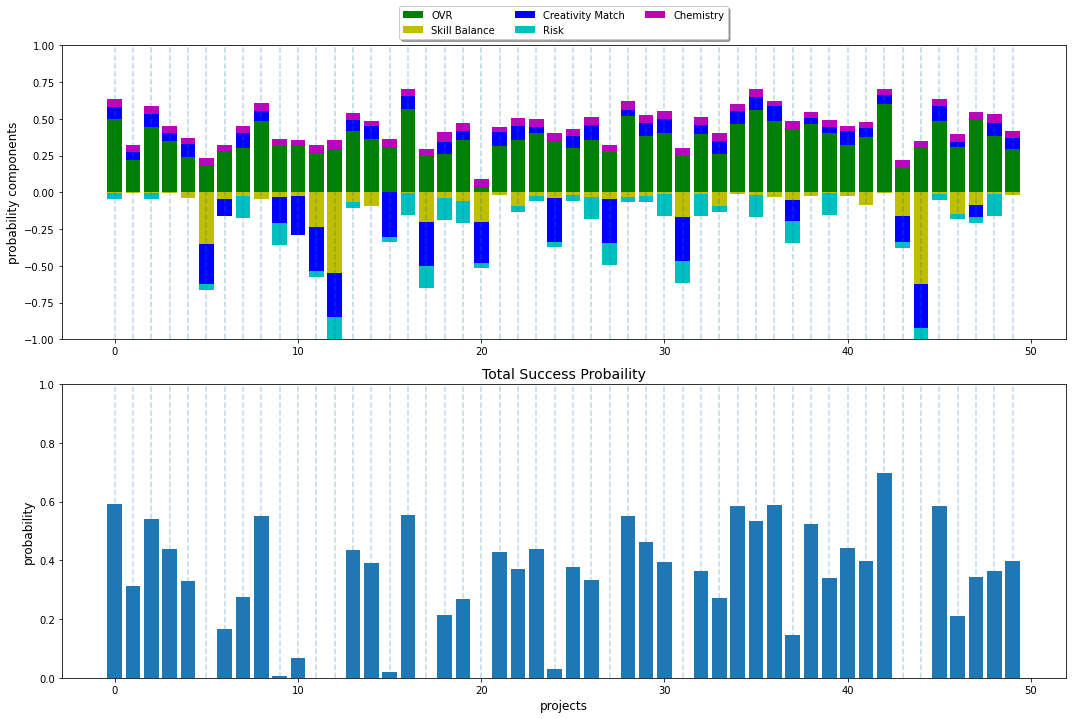

In [7]:
stack_probability_bar_chart(preset_c_projects.iloc[0:50])

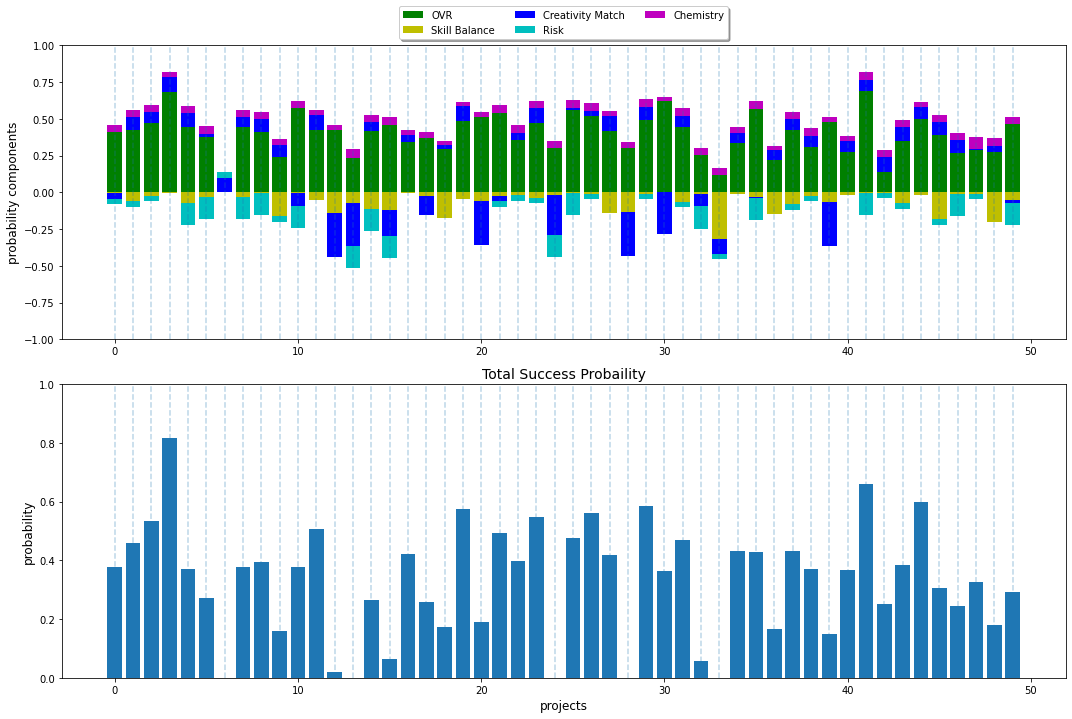

In [8]:
stack_probability_bar_chart(preset_c_projects.iloc[50:100])

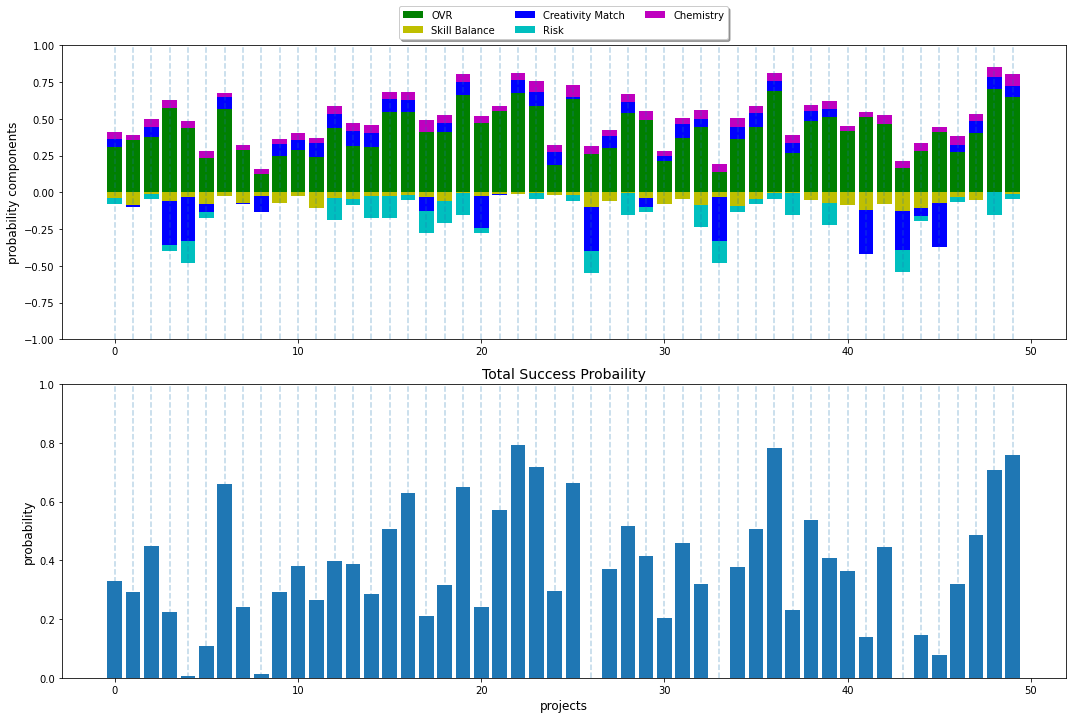

In [9]:
stack_probability_bar_chart(preset_c_projects.iloc[100:150])

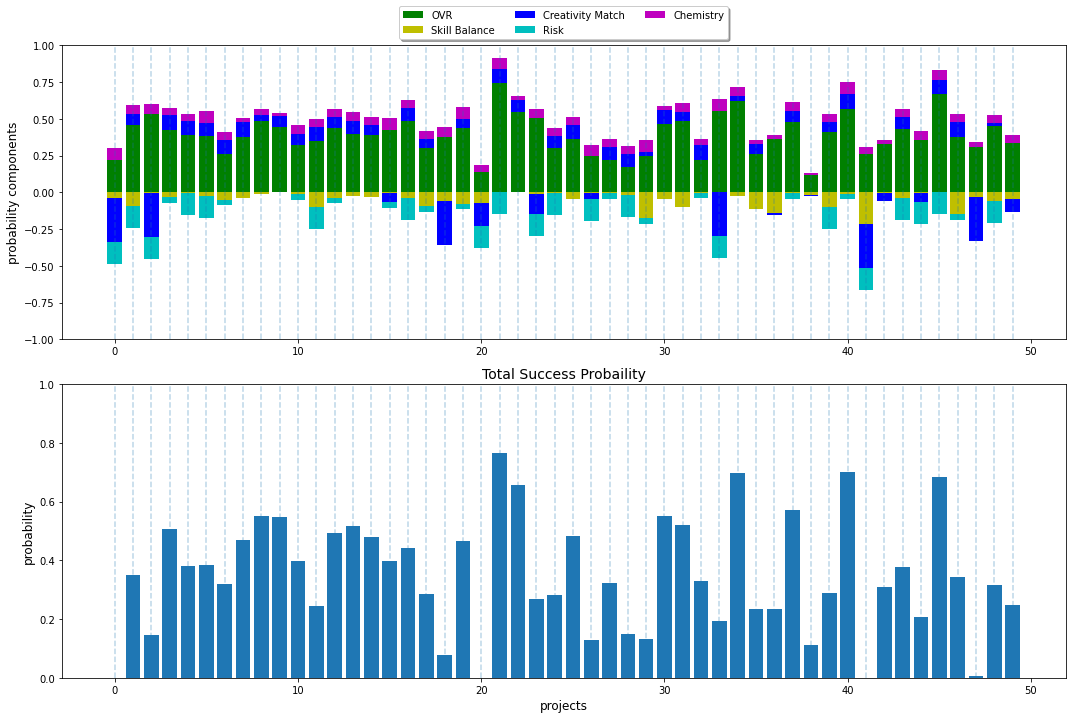

In [10]:
stack_probability_bar_chart(preset_c_projects.iloc[150:200])

#### Checking probability value ranges for each component:

In [11]:
for col in ['ovr_prob_cpt',
    'skill_balance_prob_cpt',
    'creativity_match_prob_cpt',
    'risk_prob_cpt',
    'chemistry_prob_cpt', 'prob']:
    
    print(col, '[%.2f, %.2f]' % (preset_c_projects[col].min(), preset_c_projects[col].max()))

ovr_prob_cpt [0.00, 74.37]
skill_balance_prob_cpt [-62.50, 0.00]
creativity_match_prob_cpt [-30.00, 10.00]
risk_prob_cpt [-15.00, 3.75]
chemistry_prob_cpt [0.00, 8.93]
prob [0.00, 0.83]


#### Issues to check:

- For Preset C the total success probability never exceeds 83%. So there is room for improvement? 
- skill_balance_prob_cpt exceeds original bounds [-0.4, 0]. Why? - the minimum is -62.5% for this component because you can have a skill mismatch of 5 (level 5 required but level 0 present) such that -2.5 * 5^2 = -62.5. This explanation could be improved in the documentation.


#### Normalising the probabilities?

In [29]:
def normalise(data, _min=None, _max=None):
    
    mini = _min if _min is not None else min(data)
    maxi = _max if _max is not None else max(data)
    
    return (data - mini) / (maxi - mini)

In [30]:
preset_c_projects['raw_prob'] = (
    preset_c_projects.ovr_prob_cpt 
    + preset_c_projects.skill_balance_prob_cpt 
    + preset_c_projects.creativity_match_prob_cpt 
    + preset_c_projects.risk_prob_cpt 
    + preset_c_projects.risk_prob_cpt
)

In [46]:
preset_c_projects['norm_prob'] = normalise(preset_c_projects.raw_prob, _max=95)

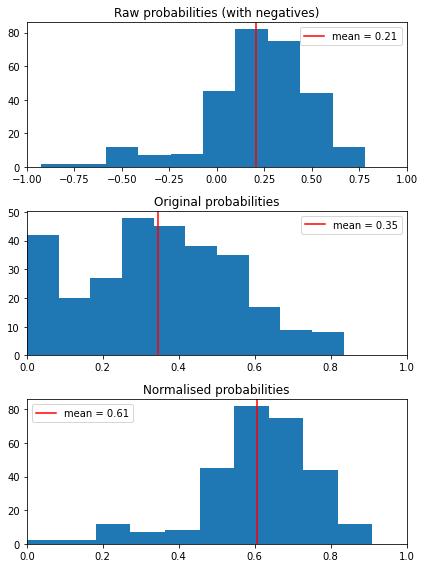

In [54]:
plt.figure(figsize=(6,8))
plt.subplot(311)
data = preset_c_projects.raw_prob / 100
plt.hist(data);
plt.axvline(
    np.mean(data), 
    color='red', 
    label='mean = %.2f' % np.mean(data)
)
plt.legend()
plt.title('Raw probabilities (with negatives)')
plt.xlim([-1.0, 1.0])

plt.subplot(312)
plt.hist(preset_c_projects.prob);
plt.axvline(
    np.mean(preset_c_projects.prob), 
    color='red', 
    label='mean = %.2f' % np.mean(preset_c_projects.prob)
)
plt.legend()
plt.xlim([0.0, 1.0])

plt.title('Original probabilities')

plt.subplot(313)
plt.hist(preset_c_projects.norm_prob);
plt.axvline(
    np.mean(preset_c_projects.norm_prob), 
    color='red', 
    label='mean = %.2f' % np.mean(preset_c_projects.norm_prob)
)
plt.legend()
plt.title('Normalised probabilities')
plt.xlim([0.0, 1.0])

plt.tight_layout()